In [42]:
import pandas as pd

from DataManagement.data_manager import DataManager
from constants import ATR_ABNORMALITY_COLUMN
data_manager = DataManager()

In [43]:
btc_1d_df = data_manager.get_historical_data_DataFrame("BTCUSDT", kline_size="1d")

In [48]:
btc_abnormal_index = btc_1d_df[btc_1d_df["atr_abnormality"]==1].index

In [13]:
def read_csv_wrapper(filepath) -> pd.DataFrame:
    df = pd.read_csv(filepath, index_col = 0)
    df.set_index(pd.to_datetime(df.index), inplace = True)
    return df


In [14]:
joint_entropy_df = read_csv_wrapper("results/09-02-2021__14:51:26/JointEntropy.csv")

In [50]:
transfer_entropy_df = read_csv_wrapper("results/09-02-2021__14:51:26/TransferEntropy.csv")

In [51]:
transfer_entropy_df_guy = read_csv_wrapper("results/09-02-2021__14:53:22/TransferEntropy.csv")

In [54]:
joint_entropy_df_guy = read_csv_wrapper("results/09-02-2021__14:53:22/JointEntropy.csv")

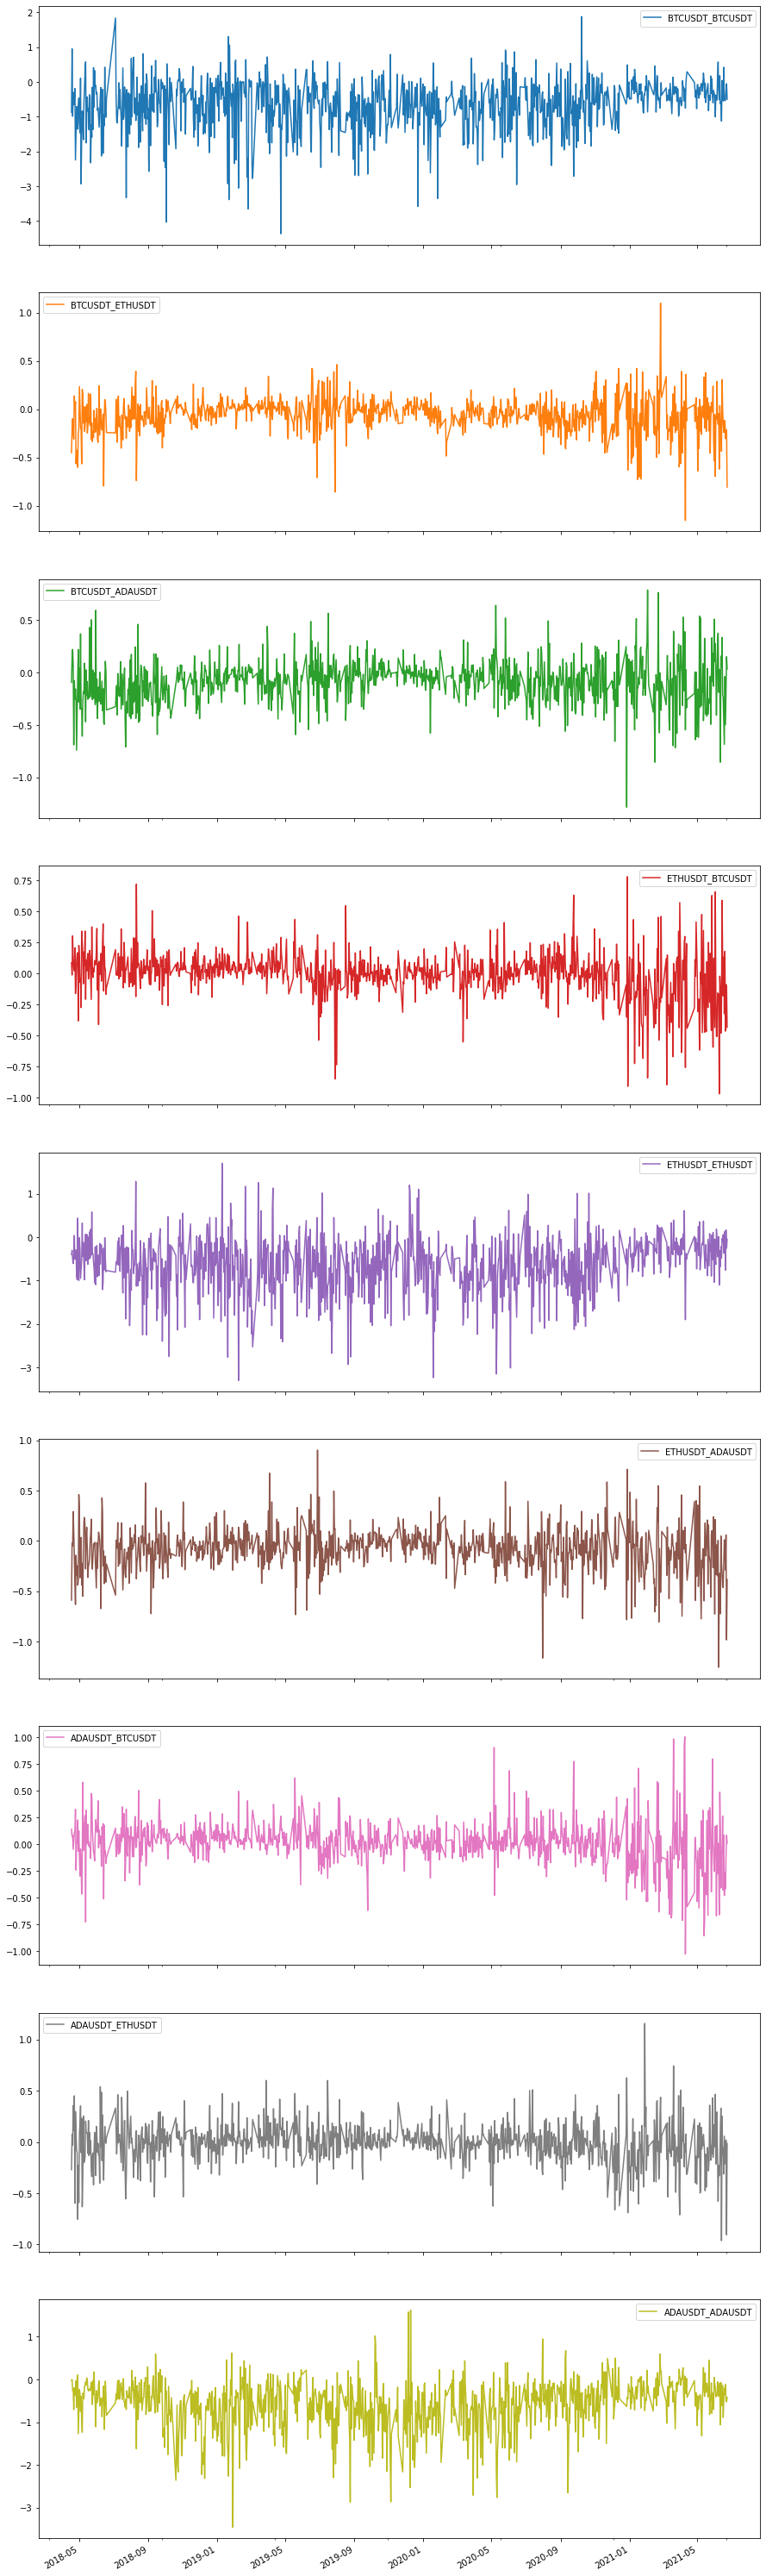

In [52]:
transfer_entropy_df_guy.plot(subplots = True, figsize = (15,60));

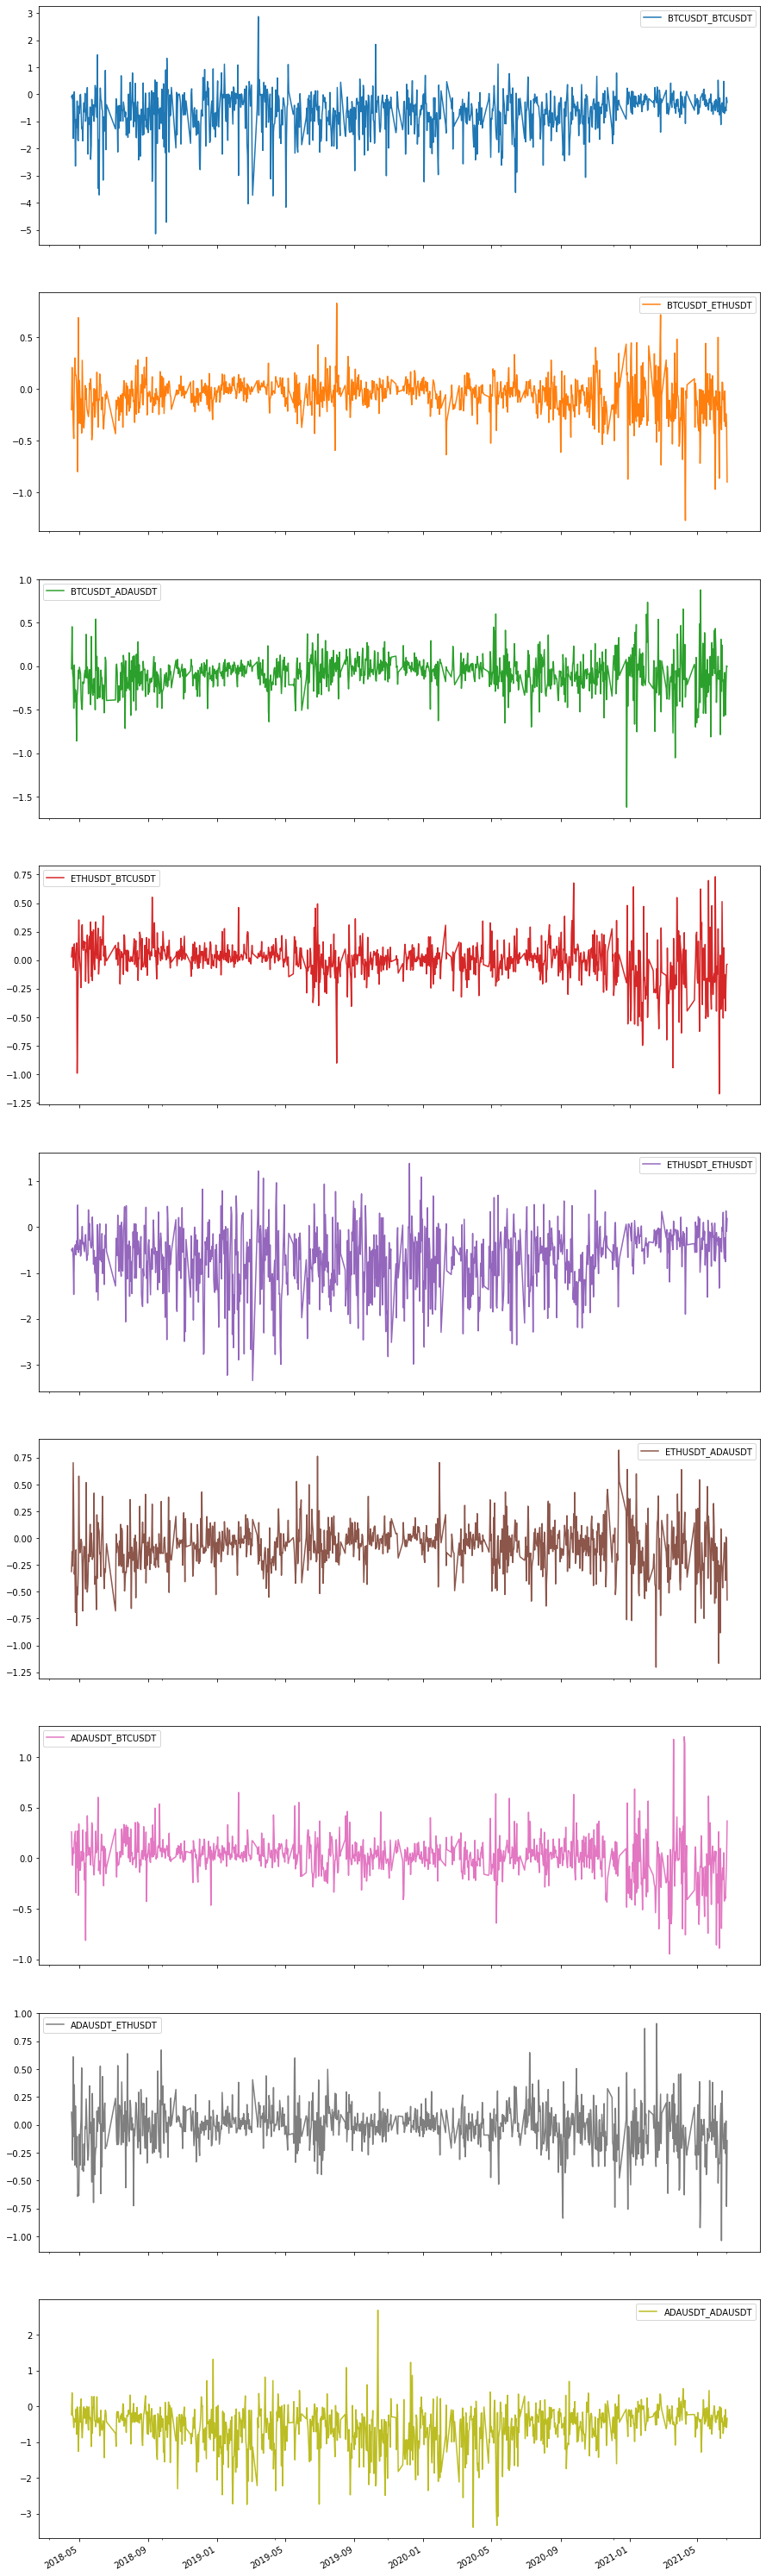

In [28]:
transfer_entropy_df.plot(subplots = True, figsize = (15,60));

In [29]:
divided_df = transfer_entropy_df/joint_entropy_df

In [55]:
divided_df_guy = transfer_entropy_df_guy/joint_entropy_df_guy

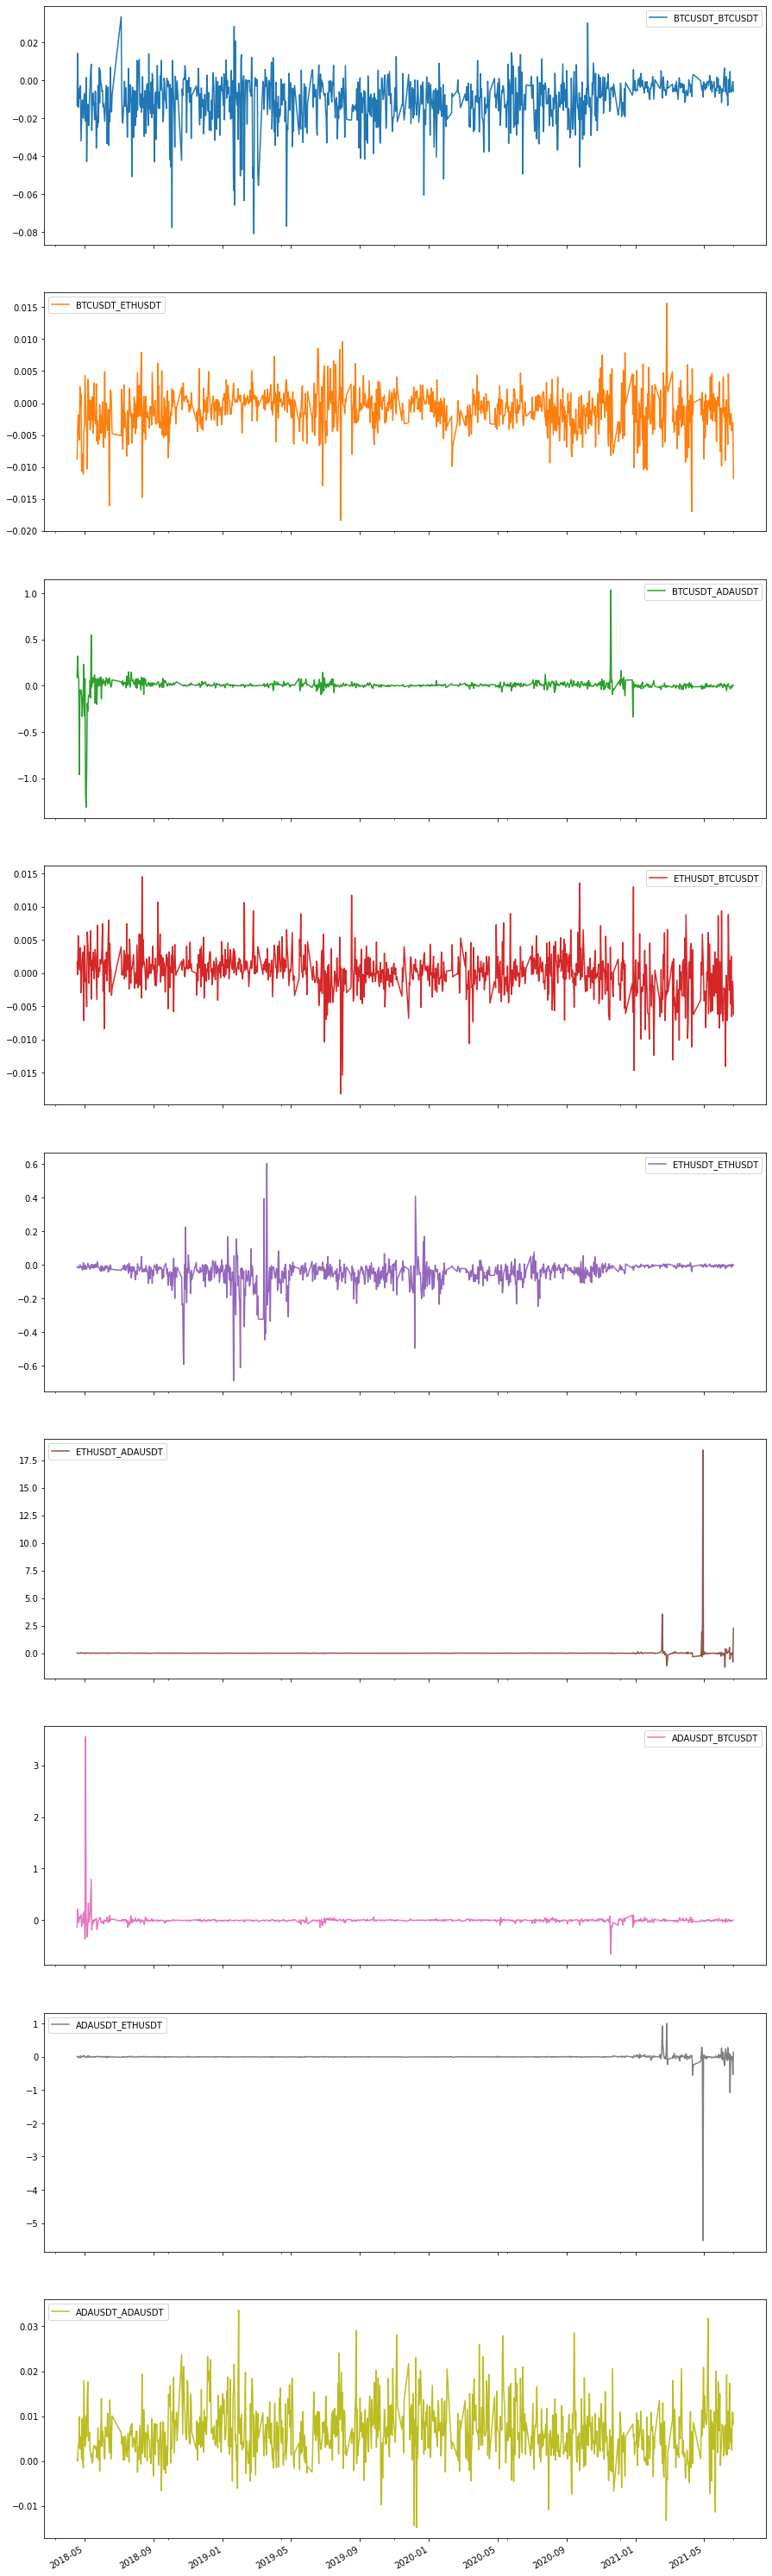

In [56]:
divided_df_guy.plot(subplots=True, figsize= (15,60));

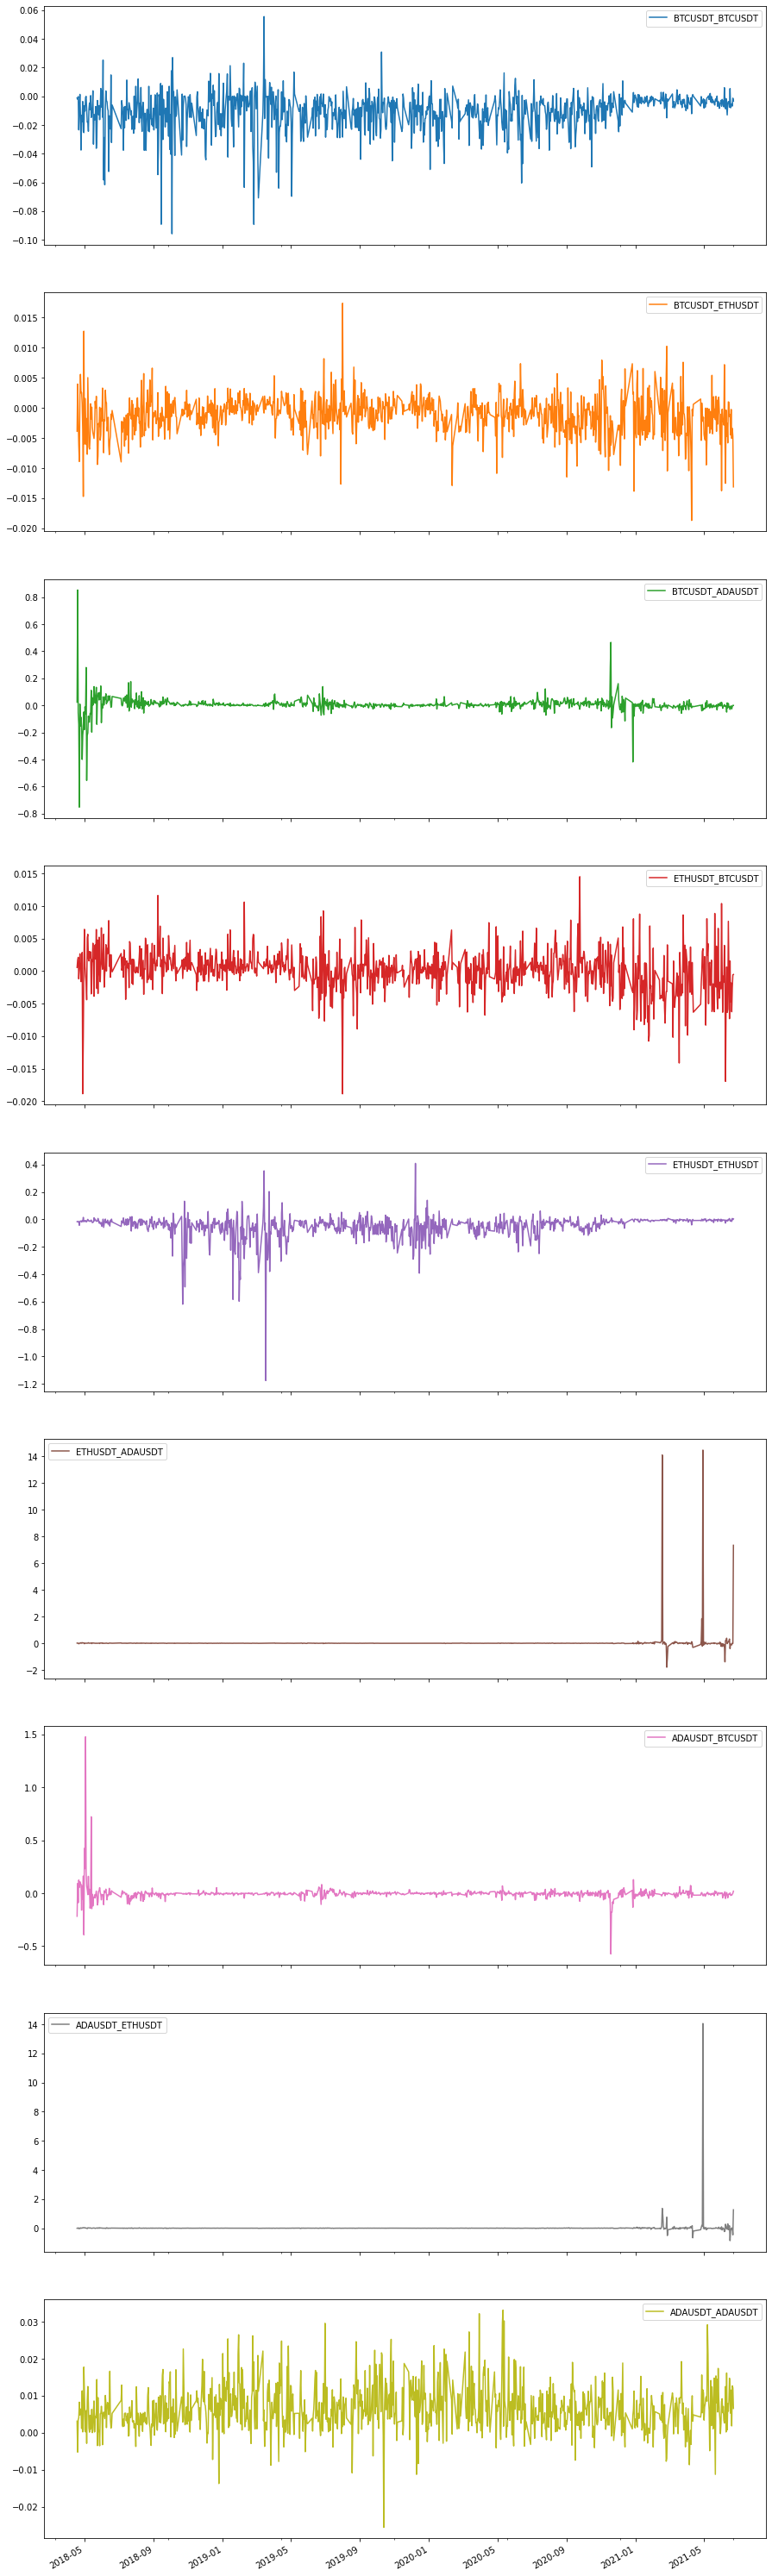

In [53]:
divided_df.plot(subplots=True, figsize= (15,60));

In [39]:
def get_max_timestamp(col):
    index_index = divided_df[col].argmax()
    return divided_df.index[index_index]


In [40]:
get_max_timestamp("ADAUSDT_ETHUSDT")

Timestamp('2021-04-30 00:00:00')

In [66]:
btc_abnormal_index = [abnormal for abnormal in btc_abnormal_index if abnormal in divided_df.index]

In [68]:
abnormal_divided_df = divided_df.loc[btc_abnormal_index]

In [71]:
abnormal_divided_df_guy = divided_df_guy.loc[btc_abnormal_index]

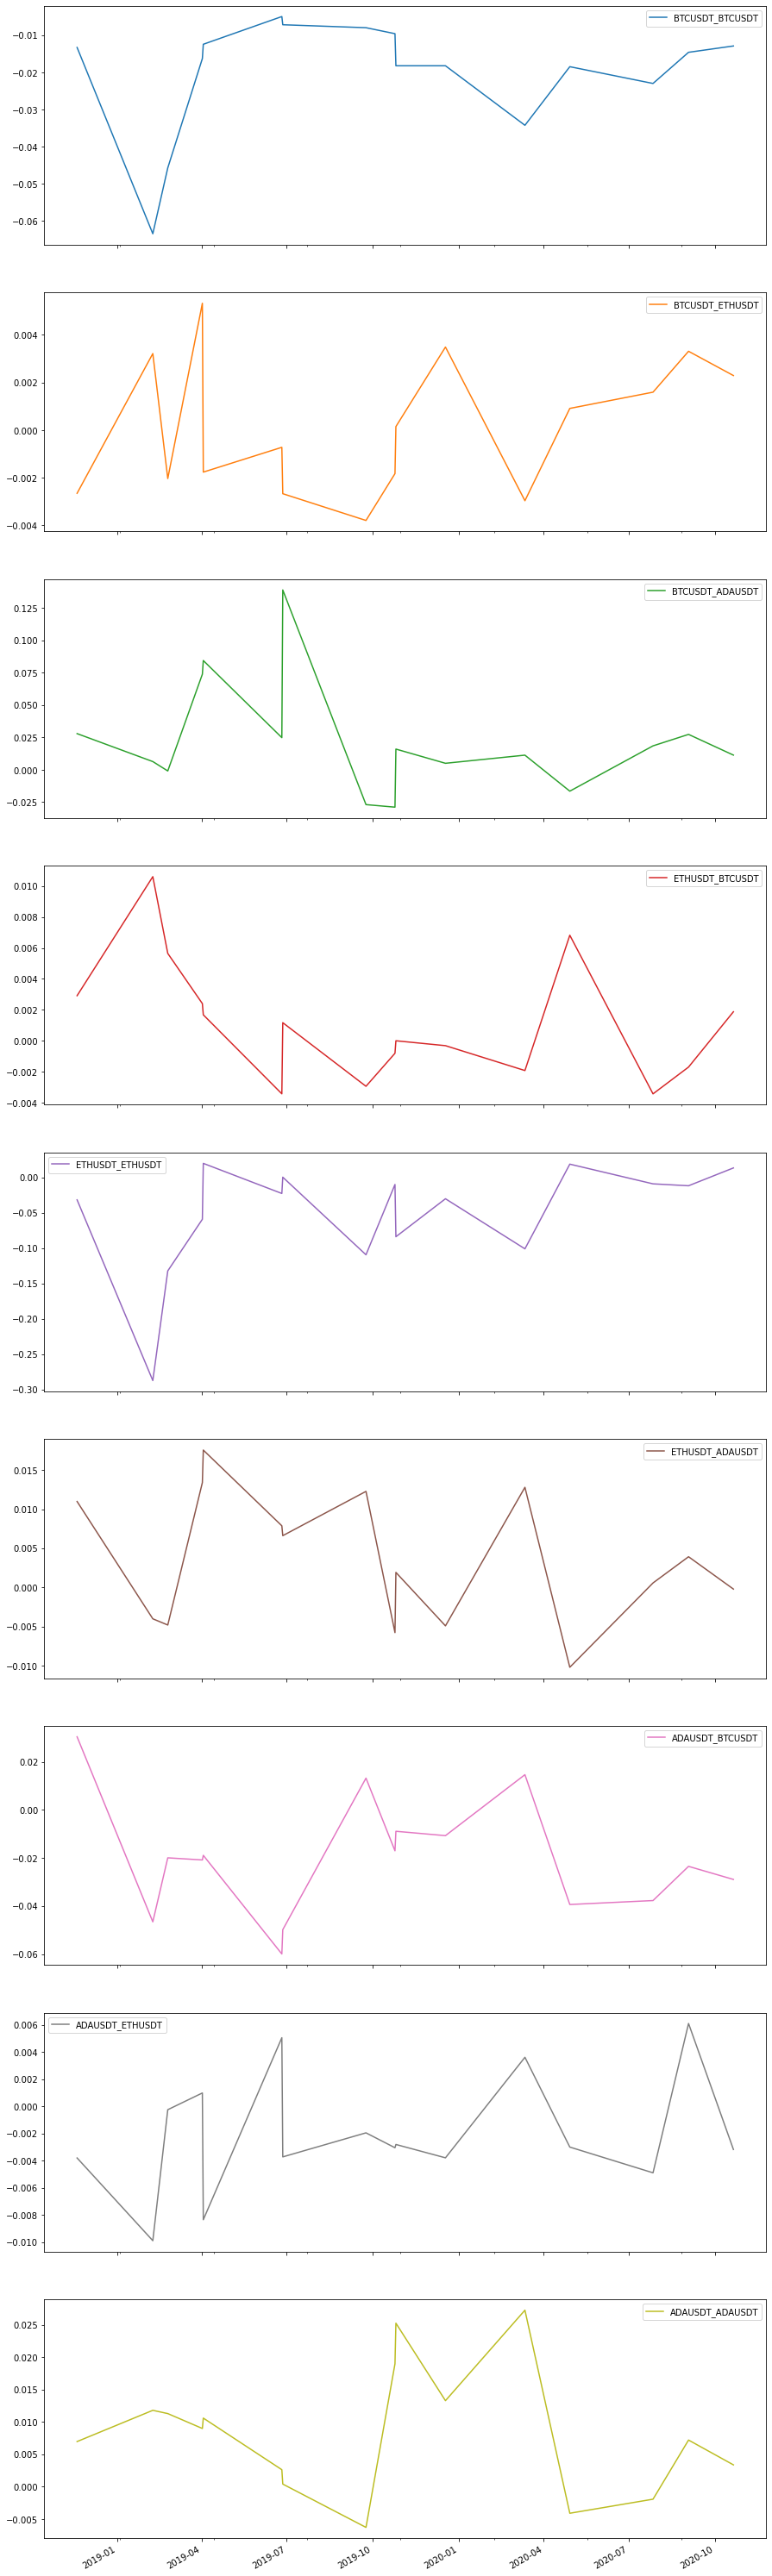

In [70]:
abnormal_divided_df.plot(subplots = True, figsize = (15,60));

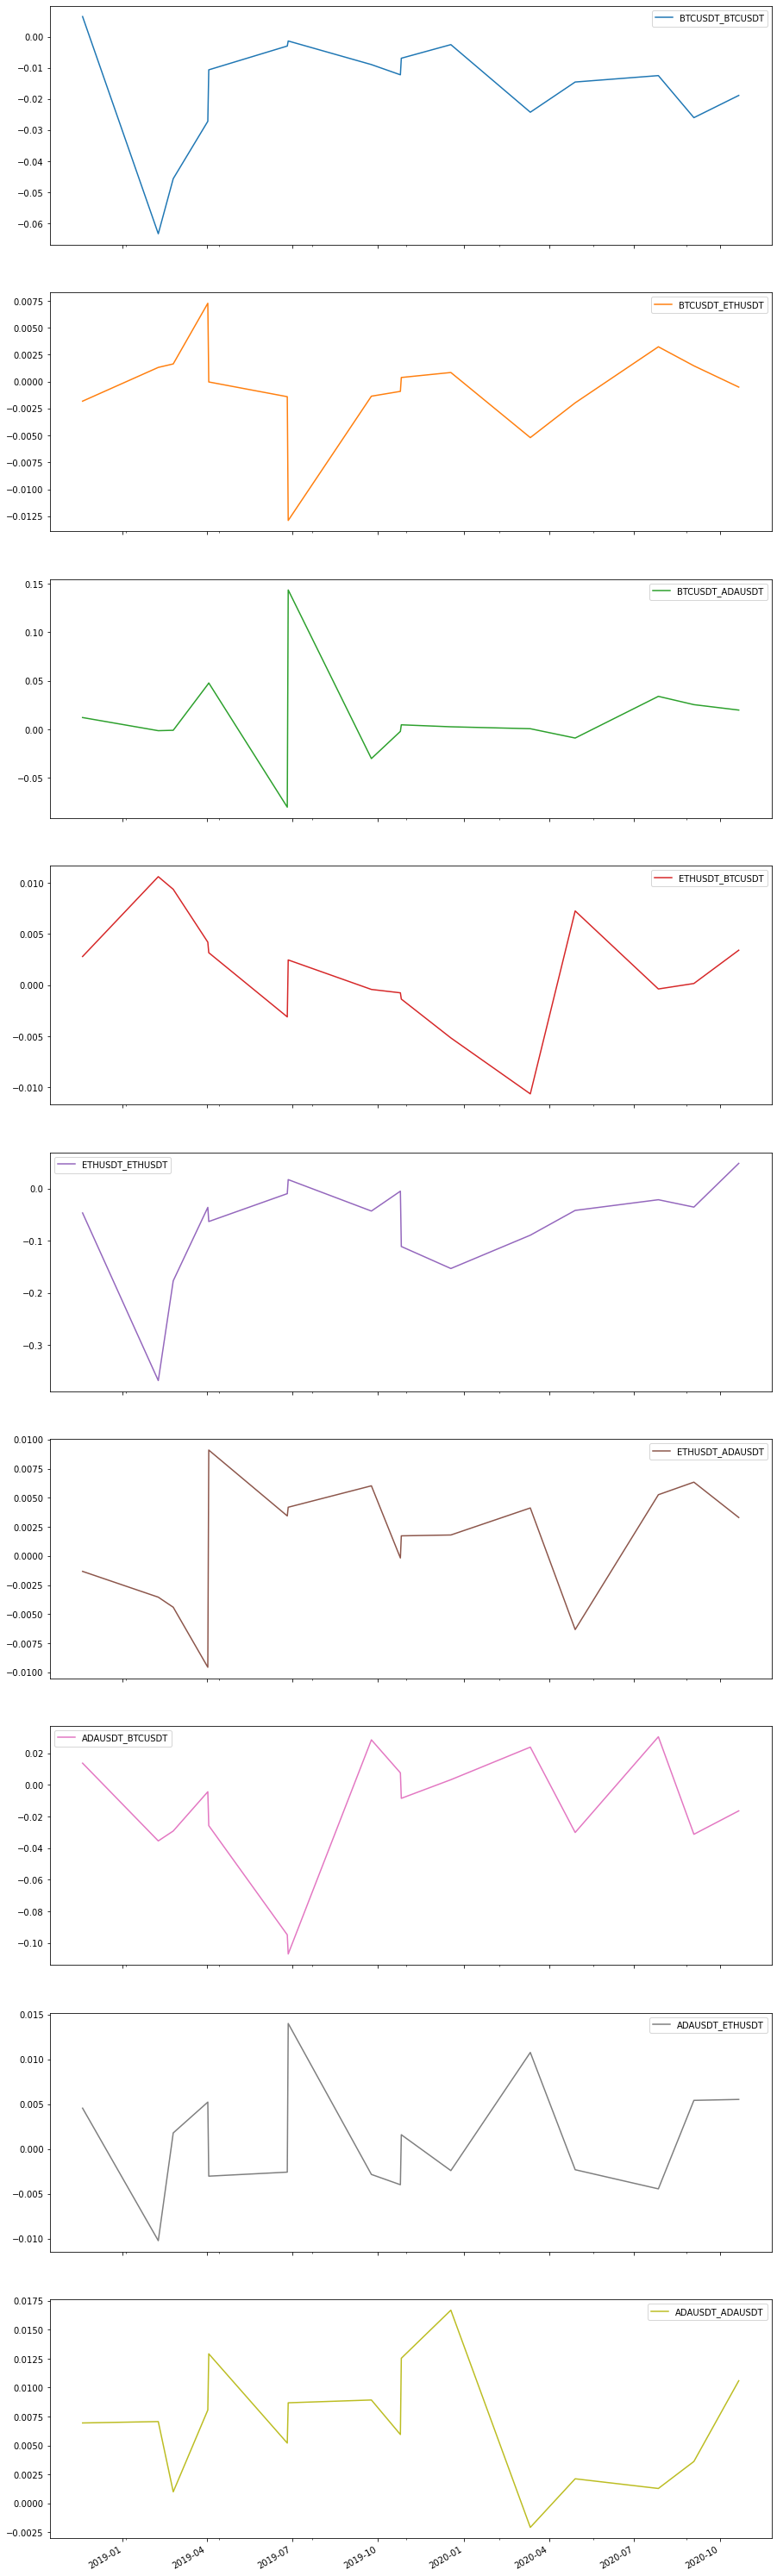

In [73]:
abnormal_divided_df_guy.plot(subplots = True, figsize = (15,60));